In [1]:
# 5_monthly_job_posting_for_India

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [35]:
df['job_posted_month_num'] = df['job_posted_date'].dt.month
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')


In [37]:
df[['job_posted_date','job_posted_month_num','job_posted_month']].sort_values(by='job_posted_date',ascending=True)

,job_posted_date,job_posted_month_num,job_posted_month
108804,2023-01-01 00:00:04,1,January
96906,2023-01-01 00:00:07,1,January
98438,2023-01-01 00:00:22,1,January
110290,2023-01-01 00:00:24,1,January
72158,2023-01-01 00:00:27,1,January
...,...,...,...
362129,2023-12-31 23:40:31,12,December
351830,2023-12-31 23:40:31,12,December
327439,2023-12-31 23:40:32,12,December
112373,2023-12-31 23:59:58,12,December


Text(0, 0.5, 'Number Of posting')

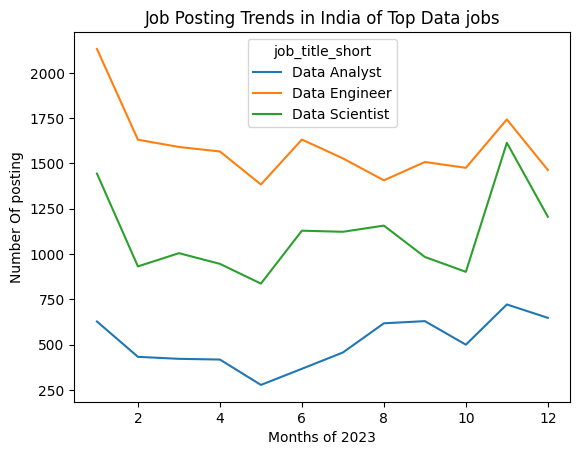

In [153]:
particular_job_titles = ['Data Analyst','Data Engineer','Data Scientist']
Job_in_India = df[df['job_country'] == 'India']
pivot_trend = Job_in_India.pivot_table(index='job_posted_month_num',columns='job_title_short',values='job_title',aggfunc='count')
pivot_trend = pivot_trend[particular_job_titles]
pivot_trend
# pivot_trend
pivot_trend.plot(kind='line')
plt.title('Job Posting Trends in India of Top Data jobs')
plt.xlabel('Months of 2023')
plt.ylabel('Number Of posting')


<Axes: xlabel='job_posted_month'>

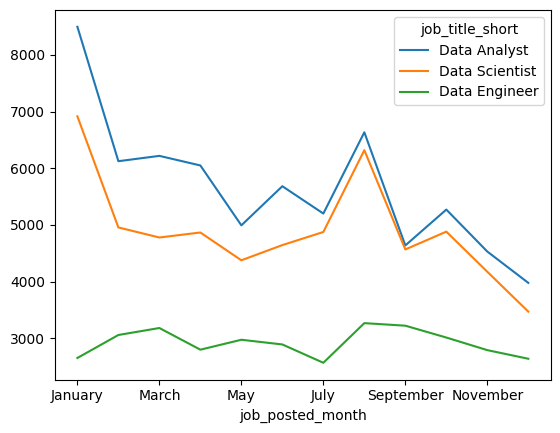

In [150]:
# same as above just used month name instead of 1-12 by using dt.strftime('%B')

particular_job_titles = ['Data Analyst','Data Scientist','Data Engineer']
Job_in_India = df[df['job_country'] == 'United States']
pivot_trend = Job_in_India.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
pivot_trend.reset_index(inplace=True)
pivot_trend['month_num'] = pd.to_datetime(pivot_trend['job_posted_month'],format='%B').dt.month
pivot_trend.sort_values(by='month_num',inplace=True)
pivot_trend.set_index('job_posted_month',inplace=True)
pivot_trend.drop(columns='month_num',inplace=True)
pivot_trend = pivot_trend[particular_job_titles]
pivot_trend 
pivot_trend.plot(kind='line')
